In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

In [100]:
!python3 '/Users/leosilva/development/thesis/workspacePyCharm/TwitterDataMining/main_generate_json_files.py'

Starting script...
Removing existing file...
Ending script...


In [101]:
data = pd.read_json(r'/Users/leosilva/development/thesis/workspacePyCharm/TwitterDataMining/alldata.json')
data.head()

,15,18,19,23,24,25
id_str_twitter,10794662,15148309,3429765093,23781146,927028057763995648,77648005
name,Maharaja of the Legacies,Sommelier de Airbnb,Paula Santana,Fe Rebelatto,✪ Felippe,Conference Distinguished Specialist
screen_name,rponte,Guilh_rm_,psanrosa13,rebelatto,FelippeRegazio,NannoKa
location,"Ceará, Brazil",somewhere in Brazil,Brasil,"Rio de Janeiro, Brasil",,Ctba-PR Brasil
url,https://t.co/3yZ94QNQvs,https://t.co/gX4oRZWHg3,https://t.co/YJQuDtv2YW,None,https://t.co/KkaPlVH4Wu,https://t.co/hDni4Fh2Ng


In [102]:
def create_tweets_pd(data, id_user):

    tweets_by_month = {}

    tweets_pd = pd.DataFrame(data[id_user]['tweets'])
    del tweets_pd[0]
    del tweets_pd[1]
    del tweets_pd[4]
    del tweets_pd[5]
    del tweets_pd[6]
    del tweets_pd[8]
    tweets_pd.columns = ["text", "created_at", "id_user"]
    tweets_pd['created_at'] = pd.to_datetime(tweets_pd['created_at'])
    tweets_pd['YearMonth'] = tweets_pd['created_at'].dt.year.astype(str) + "-" + tweets_pd['created_at'].dt.month.map("{:02}".format)
    return tweets_pd

In [103]:
def create_line_plot(df_result, id_user):

    x = df_result["YearMonth"]
    y = df_result["text"]

    tickvalues = range(0,len(x))

    fig = plt.figure(figsize=(10,6))

    plt.xticks(ticks = tickvalues ,labels = x, rotation = 'vertical')

    plt.title("Tweets per Month - Participant {}".format(id_user))
    plt.ylabel("Quantity of Tweets")
    plt.xlabel("Months")

    plt.axhline(y.mean(), color='k', linestyle='dashed', linewidth=1)
    min_ylim, max_ylim = plt.ylim()
    plt.text(y.mean()*0.05, max_ylim*1.1, 'Mean: {:.2f}'.format(y.mean()))

    plt.plot(x,y)

In [104]:
def create_histogram(df_result, id_user):

    x = df_result["YearMonth"]
    y = df_result["text"]
    
    fig = plt.figure(figsize=(10,6))

    n, bins, patches = plt.hist(y, bins='auto', color='#5643fd')

    plt.xticks(np.arange(0, 1000, 50))

    plt.axvline(y.mean(), color='k', linestyle='dashed', linewidth=1)
    min_ylim, max_ylim = plt.ylim()
    plt.text(y.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(y.mean()))

    plt.title('Tweets Frequency per Month - Participant {}'.format(id_user))
    plt.xlabel('Quantity of Tweets')
    plt.ylabel('Frequency')

    plt.show()

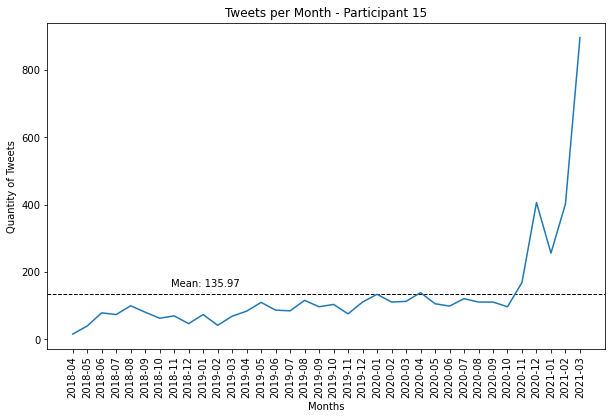

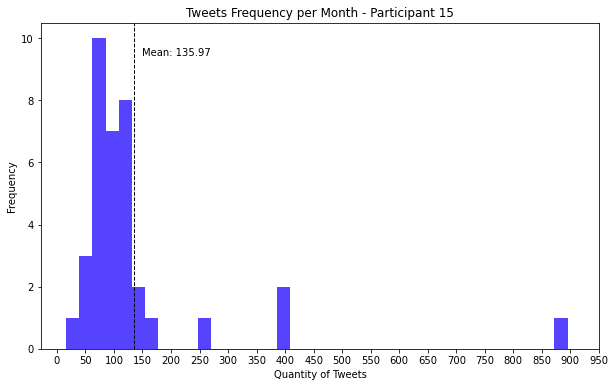

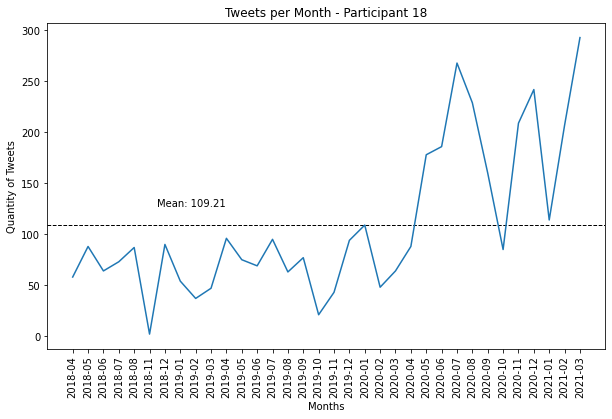

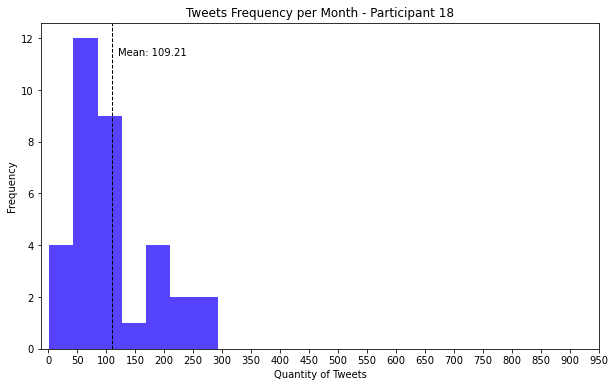

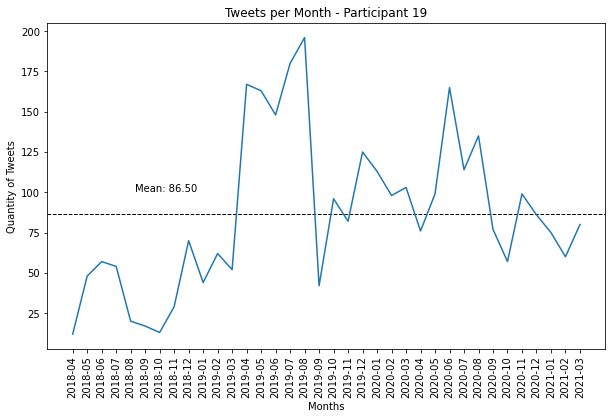

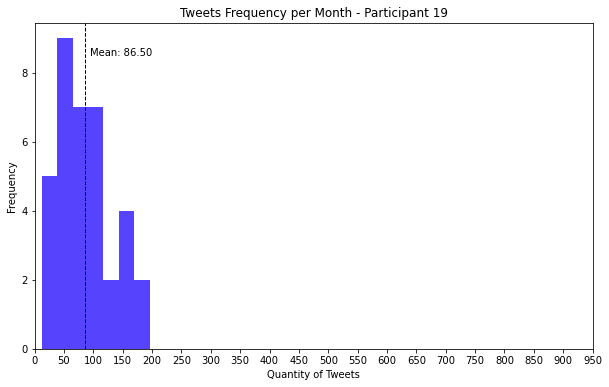

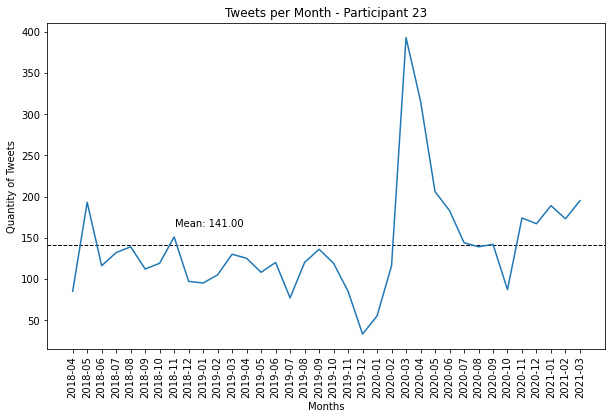

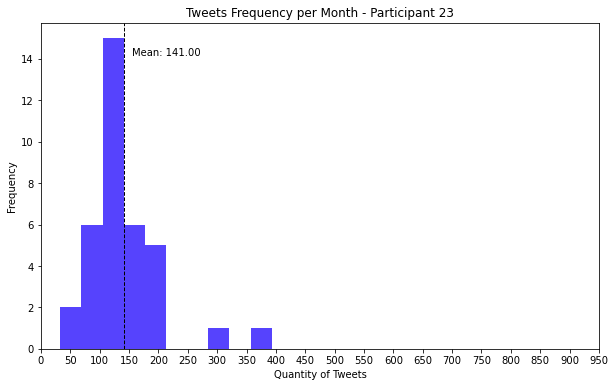

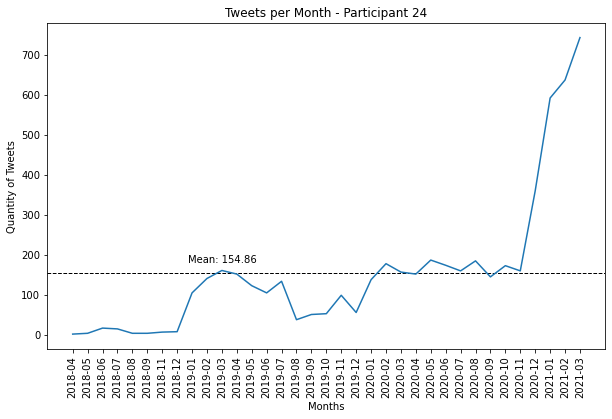

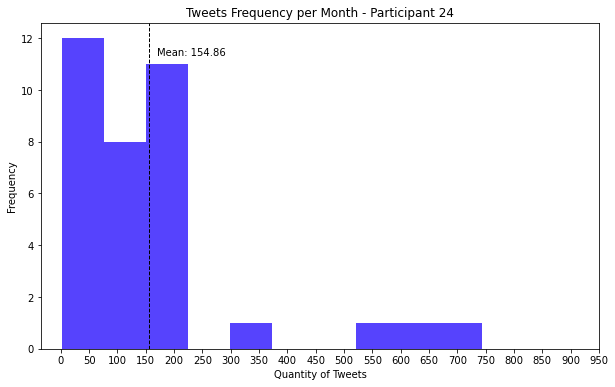

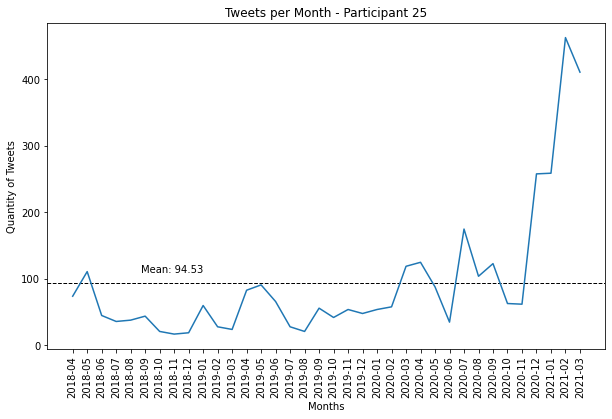

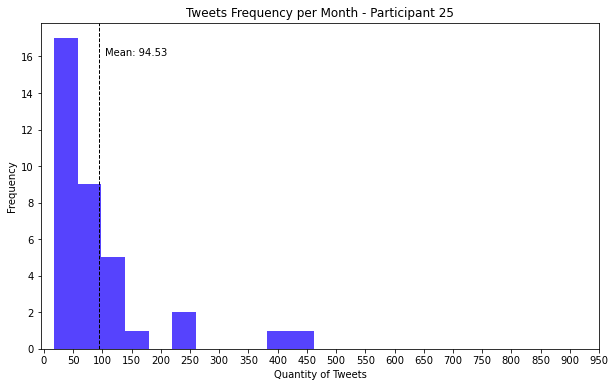

In [167]:
for c in data:
    id_user = c
    tweets_pd = create_tweets_pd(data, id_user)

    df = tweets_pd.groupby(tweets_pd["YearMonth"]).count()

    df_result = pd.DataFrame(df["text"])
    df_result["YearMonth"] = list(df_result.index)

    create_line_plot(df_result, id_user)
    create_histogram(df_result, id_user)

In [168]:
def totalize_data_by_month():
    df_result_all = {}
    all_df = []

    for c in data:
        id_user = c
        tweets_pd = create_tweets_pd(data, id_user)

        df = tweets_pd.groupby(tweets_pd["YearMonth"]).count()

        df_result = pd.DataFrame(df["text"])
        df_result["YearMonth"] = list(df_result.index)
        df_result_all = dict.fromkeys(list(df_result.index), 0)
        all_df.append(df_result)

    for d in df_result_all:
        for a in all_df:
            temp_df = a.loc[a['YearMonth']== d]
            if len(temp_df['text']) > 0:
                df_result_all[d] = df_result_all[d] + temp_df['text'][0]

    df_res = pd.DataFrame.from_records([df_result_all])
    df_res = df_res.transpose()
    return df_res

In [170]:
totalize_data_by_month().describe()

,0
count,36.000000
mean,711.694444
std,496.571204
min,216.000000
25%,427.750000
50%,578.500000
75%,866.250000
max,2617.000000


In [187]:
df = totalize_data_by_month()
df

,0
2018-04,247
2018-05,484
2018-06,378
2018-07,384
2018-08,388
2018-09,258
2018-10,216
2018-11,276
2018-12,331
2019-01,432


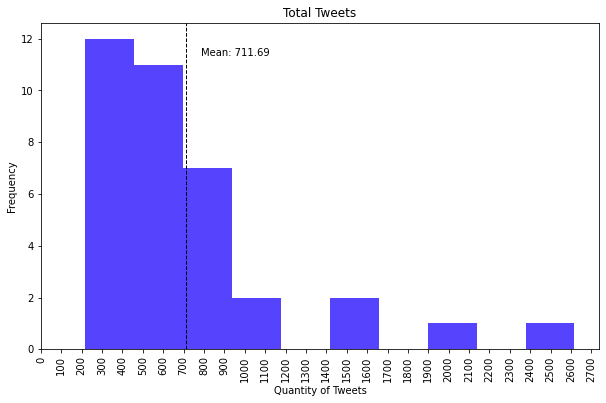

In [191]:
# HISTOGRAM OF TOTAL TWEETS, GROUPED BY MONTH

df = totalize_data_by_month()

fig = plt.figure(figsize=(10,6))

n, bins, patches = plt.hist(df, bins='auto', color='#5643fd')

plt.xticks(np.arange(0, 2800, 100), rotation = 'vertical')

plt.axvline(df.mean()[0], color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(df.mean()[0]*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(df.mean()[0]))

plt.title('Total Tweets')
plt.xlabel('Quantity of Tweets')
plt.ylabel('Frequency')

plt.show()

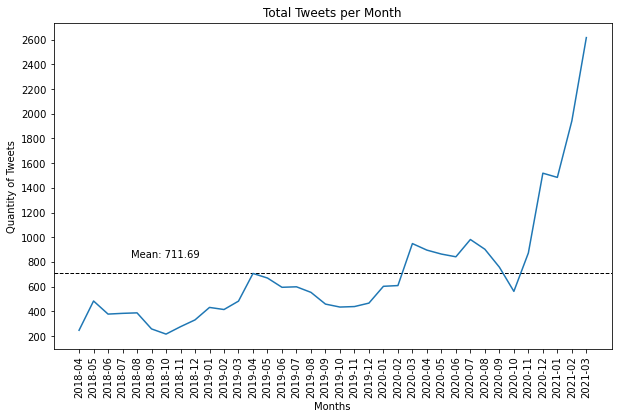

In [207]:
tickvalues = range(0,len(df.index))

fig = plt.figure(figsize=(10,6))

plt.xticks(ticks = tickvalues ,labels = df.index, rotation = 'vertical')
plt.yticks(np.arange(0, 2800, 200))

plt.title("Total Tweets per Month")
plt.ylabel("Quantity of Tweets")
plt.xlabel("Months")

plt.axhline(df.mean()[0], color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(df.mean()[0]*0.005, max_ylim*0.32, 'Mean: {:.2f}'.format(df.mean()[0]))

plt.plot(df)